In [75]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pandas import DataFrame
from matplotlib import pyplot
from keras.losses import CategoricalCrossentropy

Create a vobaulary list that includes all valid words from the training set minus the fifty most common words.

In [76]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    ps = nltk.wordnet.WordNetLemmatizer()
    tokens = [ps.lemmatize(word) for word in tokens]

    return tokens
    
    
# load all words in a file
def process_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load the vocabulary
vocab_filename = 'Project/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
caribbean = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/caribbean.txt', vocab)
christian = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/christian.txt', vocab)
country = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/country.txt', vocab)
easylistening = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/easylistening.txt', vocab)
electronic = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/electronic.txt', vocab)
folk = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/folk.txt', vocab)
hiphop = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/hiphop.txt', vocab)
jazz = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/jazz.txt', vocab)
latin = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/latin.txt', vocab)
metal = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/metal.txt', vocab)
pop = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/pop.txt', vocab)
punk = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/punk.txt', vocab)
rnb = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/rnb.txt', vocab)
rock = process_vocab('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/rock.txt', vocab)

Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accura

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
9 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 -

11 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
20 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 

22 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
1 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 -

3 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 -

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
12 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 

14 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
23 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 

25 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
4 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 -

6 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 -

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
15 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 

17 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
26 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 

28 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
7 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 -

9 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 -

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
18 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 

20 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 

Epoch 12/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 13/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 14/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 15/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 16/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 17/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 18/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 19/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 20/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 21/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 22/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01

Epoch 23/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 24/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 25/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 26/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 27/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 28/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 29/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 30/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 31/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 32/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 33/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01

Epoch 34/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 35/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 36/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 37/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 38/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 39/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 40/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 41/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 42/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 43/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 44/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01

Epoch 45/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 46/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 47/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 48/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 49/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 50/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
29 accuracy: 0.20000000298023224
Epoch 1/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 2/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 3/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 4/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 5/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 6/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 7/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 8/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 9/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 10/50
1/1 - 0s - loss: -1.5249e+01 - accuracy: 0.2000
Epoch 11/50
1/1 

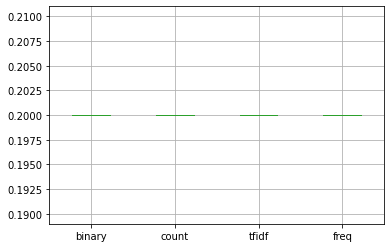

In [79]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text


# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab 
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(filename, vocab):
    lines = list()
    # walk through all files in the folder
    line = doc_to_line(filename, vocab)
    # add to list
    lines.append(line)
    return lines

# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 30
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(15, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='softmax'))
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit network
        model.fit(Xtrain, ytrain, epochs=50, verbose=2)
        # evaluate
        loss, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
	# create the tokenizer
	tokenizer = Tokenizer()
	# fit the tokenizer on the documents
	tokenizer.fit_on_texts(train_docs)
	# encode training data set
	Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
	# encode test data set
	Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
	return Xtrain, Xtest

# load all training reviews
caribbean = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/caribbean.txt', vocab)
christian = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/christian.txt', vocab)
country = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/country.txt', vocab)
easylistening = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/easylistening.txt', vocab)
electronic = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/electronic.txt', vocab)
folk = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/folk.txt', vocab)
hiphop = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/hiphop.txt', vocab)
jazz = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/jazz.txt', vocab)
latin = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/latin.txt', vocab)
metal = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/metal.txt', vocab)
pop = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/pop.txt', vocab)
punk = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/punk.txt', vocab)
rnb = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/rnb.txt', vocab)
rock = process_docs('/Users/akjen/Documents/NTNU/ml/Project/train_lyrics/rock.txt', vocab)

train_docs =  country + easylistening + hiphop + latin + pop
# load all test reviews
tcaribbean = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/caribbean.txt', vocab)
tchristian = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/christian.txt', vocab)
tcountry = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/country.txt', vocab)
teasylistening = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/easylistening.txt', vocab)
telectronic = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/electronic.txt', vocab)
tfolk = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/folk.txt', vocab)
thiphop = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/hiphop.txt', vocab)
tjazz = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/jazz.txt', vocab)
tlatin = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/latin.txt', vocab)
tmetal = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/metal.txt', vocab)
tpop = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/pop.txt', vocab)
tpunk = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/punk.txt', vocab)
trnb = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/rnb.txt', vocab)
trock = process_docs('/Users/akjen/Documents/NTNU/ml/Project/test_lyrics/rock.txt', vocab)
test_docs = tcountry + teasylistening + thiphop + tlatin + tpop

# prepare labels
ytrain = array([0 for _ in range(len(country))] + [1 for _ in range(len(easylistening))] +
               [2 for _ in range(len(hiphop))] + [3 for _ in range(len(latin))] + [4 for _ in range(len(pop))]) 
               
ytest = array([0 for _ in range(len(tcountry))] + [1 for _ in range(len(teasylistening))] +
               [2 for _ in range(len(thiphop))] + [3 for _ in range(len(tlatin))] + [4 for _ in range(len(tpop))]) 

modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
	# prepare data for mode
	Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
	# evaluate model on data for mode
	results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()



## All genres except caribbean
christian + country + easylistening + electronic + folk + hiphop + jazz + latin + metal + pop + punk + rnb + rock


## Removed the worst performing categories in kNN
country + easylistening + hiphop + latin + pop + punk + rnb + rock

## Including only best performing categories for kNN
country + easylistening + hiphop + latin + pop

In [ ]:
ytrain = array([0 for _ in range(len(christian))] + [1 for _ in range(len(country))] + [2 for _ in range(len(easylistening))] + [3 for _ in range(len(electronic))] + [4 for _ in range(len(folk))] +
               [5 for _ in range(len(hiphop))] + [6 for _ in range(len(jazz))] + [7 for _ in range(len(latin))] + [8 for _ in range(len(metal))] + [9 for _ in range(len(pop))] + [10 for _ in range(len(punk))] + 
               [11 for _ in range(len(rnb))] + [12 for _ in range(len(rock))])
ytest = array([0 for _ in range(len(tchristian))] + [1 for _ in range(len(tcountry))] + [2 for _ in range(len(teasylistening))] + [3 for _ in range(len(telectronic))] + [4 for _ in range(len(tfolk))] +
               [5 for _ in range(len(thiphop))] + [6 for _ in range(len(tjazz))] + [7 for _ in range(len(tlatin))] + [8 for _ in range(len(tmetal))] + [9 for _ in range(len(tpop))] + [10 for _ in range(len(tpunk))] + 
               [11 for _ in range(len(trnb))] + [12 for _ in range(len(trock))])